Les données utilisées ici sont extraites du siteweb "Mubawab" les jours de 21 et 22 Nov 2023

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [6]:
df = pd.read_csv("../CSV's/Mubawab_Rental_Data.csv")
print("The different features of the dataframe:\n ", df.columns)
print("\n Total number of records: ", df.shape[0])


The different features of the dataframe:
  Index(['Ville', 'Prix', 'Type De Bien', 'Surface', 'Nombre De Pièces',
       'Nombre De Chambres', 'Nombre De Salles De Bain', 'Etat De Location',
       'Age De Location', 'Étage', 'Orientation', 'Jardin', 'Terrasse',
       'Garage', 'Ascenseur', 'Piscine', 'Concierge', 'Meublé',
       'Salon Marocain', 'Salon européen', 'Climatisation', 'Sécurité',
       'Cuisine équipée', 'Réfrigérateur', 'Four', 'TV', 'Micro-ondes',
       'Animaux domestiques autorisés', 'Type du sol', 'Cheminée'],
      dtype='object')

 Total number of records:  10549


In [7]:
df.head()

,Ville,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Age De Location,Étage,...,Climatisation,Sécurité,Cuisine équipée,Réfrigérateur,Four,TV,Micro-ondes,Animaux domestiques autorisés,Type du sol,Cheminée
0,agadir,4 800 DH,Appartement,75m²,1 Pièce,2 Chambres,2 Salles de bains,Nouveau,Moins d'un an,2èmeétage,...,Non,Oui,Oui,Oui,Oui,Oui,Oui,Non,Nan,Non
1,agadir,600 DH,Appartement,111m²,2 Pièces,2 Chambres,2 Salles de bains,Nouveau,5-10 ans,1erétage,...,Non,Oui,Oui,Oui,Non,Oui,Non,Non,Nan,Non
2,agadir,4 000 DH,Appartement,75m²,1 Pièce,2 Chambres,2 Salles de bains,Nouveau,Moins d'un an,1erétage,...,Oui,Oui,Oui,Oui,Oui,Oui,Oui,Non,\r\n Carrelage,Non
3,agadir,4 000 DH,Appartement,65m²,1 Pièce,1 Chambre,1 Salle de bain,Nouveau,Moins d'un an,6èmeétage,...,Non,Non,Oui,Oui,Oui,Oui,Oui,Non,\r\n Carrelage,Non
4,agadir,4 700 DH,Appartement,85m²,3 Pièces,2 Chambres,1 Salle de bain,Nouveau,Moins d'un an,6èmeétage,...,Oui,Non,Oui,Oui,Oui,Oui,Oui,Non,\r\n Carrelage,Non


In [8]:
# Replace 'Nan' strings with actual NaN values
df = df.replace('Nan', np.nan)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10549 entries, 0 to 10548
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Ville                          10549 non-null  object
 1   Prix                           10307 non-null  object
 2   Type De Bien                   10549 non-null  object
 3   Surface                        10401 non-null  object
 4   Nombre De Pièces               10084 non-null  object
 5   Nombre De Chambres             10490 non-null  object
 6   Nombre De Salles De Bain       10453 non-null  object
 7   Etat De Location               9700 non-null   object
 8   Age De Location                6785 non-null   object
 9   Étage                          6535 non-null   object
 10  Orientation                    4773 non-null   object
 11  Jardin                         10549 non-null  object
 12  Terrasse                       10549 non-null  object
 13  G

In [10]:
# Calculate the number of nulls in each column
nulls_per_column = df.isnull().sum()

# Calculate the total number of nulls in the DataFrame
total_nulls = nulls_per_column.sum()

# Calculate the total number of unique records that contain at least one null value
total_unique_records_with_nulls = len(df[df.isnull().any(axis=1)].drop_duplicates())

print("Nulls in each feature:")
print(nulls_per_column)
print("\nTotal nulls in the DataFrame:", total_nulls)
print("\nTotal records with at least one null value: ", total_unique_records_with_nulls) 

Nulls in each feature:
Ville                               0
Prix                              242
Type De Bien                        0
Surface                           148
Nombre De Pièces                  465
Nombre De Chambres                 59
Nombre De Salles De Bain           96
Etat De Location                  849
Age De Location                  3764
Étage                            4014
Orientation                      5776
Jardin                              0
Terrasse                            0
Garage                              0
Ascenseur                           0
Piscine                             0
Concierge                           0
Meublé                              0
Salon Marocain                      0
Salon européen                      0
Climatisation                       0
Sécurité                            0
Cuisine équipée                     0
Réfrigérateur                       0
Four                                0
TV                         

Age De Location                  3765,
Étage                  4016,
Orientation                      5779,
Type du sol                      3952,
these features have many null values, so we need a strategy to handle this

In [11]:
df = df.drop(columns= ['Orientation'])
df = df.drop(columns= ['Type du sol'])

As a first strategy, we'll study the correlation of these features with the remaining features. If any of the remaining features show a high correlation with any given feature among these two attributes( Age De Location et Étage) , we'll delete this last one, as it doesn't provide additional information.


Before this, we need to perform some data transformation.

## Data Transformation

In [12]:
# drop the ‘Ville’ column and create new columns for each unique city in the ‘Ville’ column. Each new column will have binary values: 1 if the city 
# is present in the original row, and 0 otherwise
df = pd.get_dummies(df, columns=['Ville'])


In [13]:
villes = ["Ville_agadir"	,"Ville_bouskoura"	,"Ville_casablanca"	,"Ville_dar-bouazza"	,"Ville_kénitra", "Ville_marrakech","Ville_mohammedia"	,"Ville_rabat",	"Ville_salé"	,"Ville_tanger"]
for ville in villes:
    df[ville] = df[ville].map({True: 1, False: 0})


In [14]:
df.head()

,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Age De Location,Étage,Jardin,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
0,4 800 DH,Appartement,75m²,1 Pièce,2 Chambres,2 Salles de bains,Nouveau,Moins d'un an,2èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0
1,600 DH,Appartement,111m²,2 Pièces,2 Chambres,2 Salles de bains,Nouveau,5-10 ans,1erétage,Oui,...,1,0,0,0,0,0,0,0,0,0
2,4 000 DH,Appartement,75m²,1 Pièce,2 Chambres,2 Salles de bains,Nouveau,Moins d'un an,1erétage,Non,...,1,0,0,0,0,0,0,0,0,0
3,4 000 DH,Appartement,65m²,1 Pièce,1 Chambre,1 Salle de bain,Nouveau,Moins d'un an,6èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0
4,4 700 DH,Appartement,85m²,3 Pièces,2 Chambres,1 Salle de bain,Nouveau,Moins d'un an,6èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0


Transfrom the data for "Prix" Feature:
Note that some values are expressed with "EUR" currency

In [15]:
# Function to convert a single price to Dirhams
def convert_to_dirhams(price):
    if isinstance(price, str):
        # Replace commas with periods and non-breaking spaces with nothing
        price = price.replace(',', '.').replace('\xa0', '')
        if 'EUR' in price:
            # Remove 'EUR', convert to float, and convert to Dirhams
            return float(price.replace('EUR', '')) * 11
        else:
            # Remove ' DH' and convert to float
            return float(price.replace(' DH', '').replace(' ', ''))
    else:
        # If not a string, return as is
        return price

# Apply the function to each value in the 'Prix' column
df['Prix'] = df['Prix'].apply(convert_to_dirhams)

# Convert the non-null values in the 'Prix' column to integer
df.loc[df['Prix'].notna(), 'Prix'] = df.loc[df['Prix'].notna(), 'Prix'].astype(int)

df.head()

,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Age De Location,Étage,Jardin,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
0,4800.0,Appartement,75m²,1 Pièce,2 Chambres,2 Salles de bains,Nouveau,Moins d'un an,2èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0
1,600.0,Appartement,111m²,2 Pièces,2 Chambres,2 Salles de bains,Nouveau,5-10 ans,1erétage,Oui,...,1,0,0,0,0,0,0,0,0,0
2,4000.0,Appartement,75m²,1 Pièce,2 Chambres,2 Salles de bains,Nouveau,Moins d'un an,1erétage,Non,...,1,0,0,0,0,0,0,0,0,0
3,4000.0,Appartement,65m²,1 Pièce,1 Chambre,1 Salle de bain,Nouveau,Moins d'un an,6èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0
4,4700.0,Appartement,85m²,3 Pièces,2 Chambres,1 Salle de bain,Nouveau,Moins d'un an,6èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0


All values now are expressed in DH in 'Prix' feature.

"Type De Bien" column

In [16]:
df['Type De Bien'] = df['Type De Bien'].map({'Appartement': 1, 'Maison': 0})


In [17]:
df.head()

,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Age De Location,Étage,Jardin,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
0,4800.0,1,75m²,1 Pièce,2 Chambres,2 Salles de bains,Nouveau,Moins d'un an,2èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0
1,600.0,1,111m²,2 Pièces,2 Chambres,2 Salles de bains,Nouveau,5-10 ans,1erétage,Oui,...,1,0,0,0,0,0,0,0,0,0
2,4000.0,1,75m²,1 Pièce,2 Chambres,2 Salles de bains,Nouveau,Moins d'un an,1erétage,Non,...,1,0,0,0,0,0,0,0,0,0
3,4000.0,1,65m²,1 Pièce,1 Chambre,1 Salle de bain,Nouveau,Moins d'un an,6èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0
4,4700.0,1,85m²,3 Pièces,2 Chambres,1 Salle de bain,Nouveau,Moins d'un an,6èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0


"Surface" column Transformation using regular expression:

In [18]:
df['Surface'] = df['Surface'].str.extract(r'(\d+)')  # keep only the numeric part
df['Surface'] = pd.to_numeric(df['Surface'], errors='coerce')  # convert the cleaned column to float type

In [19]:
df.head()

,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Age De Location,Étage,Jardin,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
0,4800.0,1,75.0,1 Pièce,2 Chambres,2 Salles de bains,Nouveau,Moins d'un an,2èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0
1,600.0,1,111.0,2 Pièces,2 Chambres,2 Salles de bains,Nouveau,5-10 ans,1erétage,Oui,...,1,0,0,0,0,0,0,0,0,0
2,4000.0,1,75.0,1 Pièce,2 Chambres,2 Salles de bains,Nouveau,Moins d'un an,1erétage,Non,...,1,0,0,0,0,0,0,0,0,0
3,4000.0,1,65.0,1 Pièce,1 Chambre,1 Salle de bain,Nouveau,Moins d'un an,6èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0
4,4700.0,1,85.0,3 Pièces,2 Chambres,1 Salle de bain,Nouveau,Moins d'un an,6èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0


"Nombre De Piècess" column 

In [20]:
df['Nombre De Pièces'] = df['Nombre De Pièces'].str.extract(r'(\d+)')  # keep only the numeric part
df['Nombre De Pièces'] = pd.to_numeric(df['Nombre De Pièces'], errors='coerce')  # convert the cleaned column to float type


In [21]:
df.head()

,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Age De Location,Étage,Jardin,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
0,4800.0,1,75.0,1.0,2 Chambres,2 Salles de bains,Nouveau,Moins d'un an,2èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0
1,600.0,1,111.0,2.0,2 Chambres,2 Salles de bains,Nouveau,5-10 ans,1erétage,Oui,...,1,0,0,0,0,0,0,0,0,0
2,4000.0,1,75.0,1.0,2 Chambres,2 Salles de bains,Nouveau,Moins d'un an,1erétage,Non,...,1,0,0,0,0,0,0,0,0,0
3,4000.0,1,65.0,1.0,1 Chambre,1 Salle de bain,Nouveau,Moins d'un an,6èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0
4,4700.0,1,85.0,3.0,2 Chambres,1 Salle de bain,Nouveau,Moins d'un an,6èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0


"Nombre De Chambres" column Transformation:

In [22]:
df['Nombre De Chambres'] = df['Nombre De Chambres'].str.extract(r'(\d+)')  # keep only the numeric part
df['Nombre De Chambres'] = pd.to_numeric(df['Nombre De Chambres'], errors='coerce')  # convert the cleaned column to float type

In [23]:
df.head()

,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Age De Location,Étage,Jardin,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
0,4800.0,1,75.0,1.0,2.0,2 Salles de bains,Nouveau,Moins d'un an,2èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0
1,600.0,1,111.0,2.0,2.0,2 Salles de bains,Nouveau,5-10 ans,1erétage,Oui,...,1,0,0,0,0,0,0,0,0,0
2,4000.0,1,75.0,1.0,2.0,2 Salles de bains,Nouveau,Moins d'un an,1erétage,Non,...,1,0,0,0,0,0,0,0,0,0
3,4000.0,1,65.0,1.0,1.0,1 Salle de bain,Nouveau,Moins d'un an,6èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0
4,4700.0,1,85.0,3.0,2.0,1 Salle de bain,Nouveau,Moins d'un an,6èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0


" Nombre De Salles De Bain" column transformation

In [24]:
df['Nombre De Salles De Bain'] = df['Nombre De Salles De Bain'].str.extract(r'(\d+)')  # keep only the numeric part
df['Nombre De Salles De Bain'] = pd.to_numeric(df['Nombre De Salles De Bain'], errors='coerce')  # convert the cleaned column to float type


In [25]:
df.head()

,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Age De Location,Étage,Jardin,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
0,4800.0,1,75.0,1.0,2.0,2.0,Nouveau,Moins d'un an,2èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0
1,600.0,1,111.0,2.0,2.0,2.0,Nouveau,5-10 ans,1erétage,Oui,...,1,0,0,0,0,0,0,0,0,0
2,4000.0,1,75.0,1.0,2.0,2.0,Nouveau,Moins d'un an,1erétage,Non,...,1,0,0,0,0,0,0,0,0,0
3,4000.0,1,65.0,1.0,1.0,1.0,Nouveau,Moins d'un an,6èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0
4,4700.0,1,85.0,3.0,2.0,1.0,Nouveau,Moins d'un an,6èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0


"Etat De Location" column Transformation:
Bon etat--------> 1,
Nouveau---------> 2

In [26]:
df['Etat De Location'] = df['Etat De Location'].replace({'Nouveau': 2, 'Bon état': 1})


In [27]:
df.head()

,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Age De Location,Étage,Jardin,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
0,4800.0,1,75.0,1.0,2.0,2.0,2.0,Moins d'un an,2èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0
1,600.0,1,111.0,2.0,2.0,2.0,2.0,5-10 ans,1erétage,Oui,...,1,0,0,0,0,0,0,0,0,0
2,4000.0,1,75.0,1.0,2.0,2.0,2.0,Moins d'un an,1erétage,Non,...,1,0,0,0,0,0,0,0,0,0
3,4000.0,1,65.0,1.0,1.0,1.0,2.0,Moins d'un an,6èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0
4,4700.0,1,85.0,3.0,2.0,1.0,2.0,Moins d'un an,6èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0


"Age De Location" column Tranformation:
we replace each value with the average age of the location

In [28]:
df['Age De Location'] = df['Age De Location'].replace({
    "Moins d'un an": 0, 
    '1-5 ans': 3, 
    '5-10 ans': 7, 
    '10-20 ans': 15, 
    '20-30 ans': 25,
    '30-50 ans': 40, 
    '50-70 ans': 60, 
    '70-100 ans': 85, 
    'Plus de 100 ans': 100, 
    'Nan': np.nan
})


In [29]:
df.head()

,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Age De Location,Étage,Jardin,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
0,4800.0,1,75.0,1.0,2.0,2.0,2.0,0.0,2èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0
1,600.0,1,111.0,2.0,2.0,2.0,2.0,7.0,1erétage,Oui,...,1,0,0,0,0,0,0,0,0,0
2,4000.0,1,75.0,1.0,2.0,2.0,2.0,0.0,1erétage,Non,...,1,0,0,0,0,0,0,0,0,0
3,4000.0,1,65.0,1.0,1.0,1.0,2.0,0.0,6èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0
4,4700.0,1,85.0,3.0,2.0,1.0,2.0,0.0,6èmeétage,Non,...,1,0,0,0,0,0,0,0,0,0


"Étage" column Transformation:

In [30]:
df['Étage'] = df['Étage'].str.extract(r'(\d+)')  # keep only the numeric part
df['Étage'] = pd.to_numeric(df['Étage'], errors='coerce')  # convert the cleaned column to float type


In [31]:
df.head()

,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Age De Location,Étage,Jardin,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
0,4800.0,1,75.0,1.0,2.0,2.0,2.0,0.0,2.0,Non,...,1,0,0,0,0,0,0,0,0,0
1,600.0,1,111.0,2.0,2.0,2.0,2.0,7.0,1.0,Oui,...,1,0,0,0,0,0,0,0,0,0
2,4000.0,1,75.0,1.0,2.0,2.0,2.0,0.0,1.0,Non,...,1,0,0,0,0,0,0,0,0,0
3,4000.0,1,65.0,1.0,1.0,1.0,2.0,0.0,6.0,Non,...,1,0,0,0,0,0,0,0,0,0
4,4700.0,1,85.0,3.0,2.0,1.0,2.0,0.0,6.0,Non,...,1,0,0,0,0,0,0,0,0,0


"Jardin", "Garage", "Terrasse", "Ascenseur", "Piscine", "Concierge", "Meublé", "Salon Marocain", "Salon européen", "Climatisation", "Sécurité", "Cuisine équipée", "Réfrigérateur","Four", "TV", "Micro-ondes", "Animaux domestiques autorisés", "Cheminée" columns Transformation

In [32]:
columns = ["Jardin", "Garage", "Terrasse", "Ascenseur", "Piscine", "Concierge", "Meublé", "Salon Marocain", "Salon européen", "Climatisation", "Sécurité", "Cuisine équipée", "Réfrigérateur","Four", "TV", "Micro-ondes", "Animaux domestiques autorisés", "Cheminée"]

for column in columns:
    df[column] = df[column].replace({"Oui": 1, "Non": 0})

In [33]:
df.head()

,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Age De Location,Étage,Jardin,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
0,4800.0,1,75.0,1.0,2.0,2.0,2.0,0.0,2.0,0,...,1,0,0,0,0,0,0,0,0,0
1,600.0,1,111.0,2.0,2.0,2.0,2.0,7.0,1.0,1,...,1,0,0,0,0,0,0,0,0,0
2,4000.0,1,75.0,1.0,2.0,2.0,2.0,0.0,1.0,0,...,1,0,0,0,0,0,0,0,0,0
3,4000.0,1,65.0,1.0,1.0,1.0,2.0,0.0,6.0,0,...,1,0,0,0,0,0,0,0,0,0
4,4700.0,1,85.0,3.0,2.0,1.0,2.0,0.0,6.0,0,...,1,0,0,0,0,0,0,0,0,0


After transforming the data, we'll study the correlation:

#### Correlation de "Age De Location" 

In [34]:
df_test = df
df_test = df_test.dropna(subset=['Etat De Location', 'Age De Location'])

correlation, p_value = stats.pointbiserialr(df_test['Etat De Location'], df_test['Age De Location'])

print("Correlation:", correlation)
print("P-value:", p_value)


Correlation: -0.407779696075875
P-value: 1.0229555665534427e-268


In [35]:
nulls_per_column = df_test.isnull().sum()
print(nulls_per_column)

Prix                              157
Type De Bien                        0
Surface                             9
Nombre De Pièces                    2
Nombre De Chambres                  2
Nombre De Salles De Bain            2
Etat De Location                    0
Age De Location                     0
Étage                            1209
Jardin                              0
Terrasse                            0
Garage                              0
Ascenseur                           0
Piscine                             0
Concierge                           0
Meublé                              0
Salon Marocain                      0
Salon européen                      0
Climatisation                       0
Sécurité                            0
Cuisine équipée                     0
Réfrigérateur                       0
Four                                0
TV                                  0
Micro-ondes                         0
Animaux domestiques autorisés       0
Cheminée    

In [36]:
df_test.dropna()

,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Age De Location,Étage,Jardin,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
0,4800.0,1,75.0,1.0,2.0,2.0,2.0,0.0,2.0,0,...,1,0,0,0,0,0,0,0,0,0
1,600.0,1,111.0,2.0,2.0,2.0,2.0,7.0,1.0,1,...,1,0,0,0,0,0,0,0,0,0
2,4000.0,1,75.0,1.0,2.0,2.0,2.0,0.0,1.0,0,...,1,0,0,0,0,0,0,0,0,0
3,4000.0,1,65.0,1.0,1.0,1.0,2.0,0.0,6.0,0,...,1,0,0,0,0,0,0,0,0,0
4,4700.0,1,85.0,3.0,2.0,1.0,2.0,0.0,6.0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10510,7000.0,1,90.0,3.0,2.0,2.0,2.0,7.0,3.0,0,...,0,0,0,0,0,0,0,0,0,1
10511,12500.0,1,150.0,4.0,3.0,2.0,2.0,3.0,3.0,0,...,0,0,0,0,0,0,0,0,0,1
10513,16000.0,1,132.0,4.0,3.0,3.0,2.0,3.0,8.0,1,...,0,0,0,0,0,0,0,0,0,1
10545,5500.0,1,109.0,3.0,2.0,1.0,1.0,25.0,4.0,0,...,0,0,0,0,0,0,0,0,0,1


We notice a high moderated negative correlation between "Age De Location" & "Etat De Location" variables, so we can delete the "Age De Location" column

In [37]:
df = df.drop(columns = ["Age De Location"])


In [38]:
df.shape

(10549, 36)

#### Correlation de "Étage"

In [39]:
df_test = df_test.dropna(subset=['Ascenseur', 'Étage'])

correlation, p_value = stats.pointbiserialr(df_test['Ascenseur'], df_test['Étage'])

print("Correlation:", correlation)
print("P-value:", p_value)


Correlation: 0.16734155300862982
P-value: 4.5741184366295416e-36


We did not find any feature that is highly correlated with this column. So we may use the K-Nearest Neighbors (KNN) Imputation method.
But before this we'll process a little bit this data so that the KNN works well

#### Checking for duplicate values


In [40]:
df[df.duplicated()].head()


,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Étage,Jardin,Terrasse,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
439,NaN,1,58.0,2.0,2.0,1.0,2.0,1.0,1,1,...,1,0,0,0,0,0,0,0,0,0
470,8500.0,1,75.0,1.0,1.0,1.0,2.0,3.0,1,1,...,1,0,0,0,0,0,0,0,0,0
471,4300.0,1,81.0,2.0,2.0,2.0,2.0,4.0,1,1,...,1,0,0,0,0,0,0,0,0,0
472,NaN,1,60.0,2.0,2.0,1.0,2.0,3.0,0,0,...,1,0,0,0,0,0,0,0,0,0
473,NaN,1,120.0,2.0,2.0,1.0,1.0,1.0,1,1,...,1,0,0,0,0,0,0,0,0,0


In [41]:
duplicates = df.duplicated()
print(duplicates.sum())


115


In [42]:
df = df.drop_duplicates()


In [43]:
df.shape

(10434, 36)

In [44]:
df.head(10)

,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Étage,Jardin,Terrasse,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
0,4800.0,1,75.0,1.0,2.0,2.0,2.0,2.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,600.0,1,111.0,2.0,2.0,2.0,2.0,1.0,1,1,...,1,0,0,0,0,0,0,0,0,0
2,4000.0,1,75.0,1.0,2.0,2.0,2.0,1.0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4000.0,1,65.0,1.0,1.0,1.0,2.0,6.0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4700.0,1,85.0,3.0,2.0,1.0,2.0,6.0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,400.0,1,85.0,1.0,1.0,1.0,2.0,6.0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,5000.0,1,86.0,3.0,2.0,2.0,1.0,NaN,0,1,...,1,0,0,0,0,0,0,0,0,0
7,3700.0,1,80.0,1.0,2.0,2.0,2.0,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
8,8500.0,1,75.0,1.0,1.0,1.0,2.0,3.0,1,1,...,1,0,0,0,0,0,0,0,0,0
9,4300.0,1,81.0,2.0,2.0,2.0,2.0,4.0,1,1,...,1,0,0,0,0,0,0,0,0,0


In [45]:
df.shape

(10434, 36)

Étage column imputation

In [46]:
from sklearn.linear_model import LinearRegression

# Separate the data into two dataframes: one with nulls in 'Étage' and one without
df_with_etage = df[df['Étage'].notnull()].copy()
df_without_etage = df[df['Étage'].isnull()].copy()
# Replace nulls in these columns with the mean of the column
features = df.columns.drop('Étage')
for feature in features:
    df_with_etage[feature].fillna(df_with_etage[feature].mean(), inplace=True)
    df_without_etage[feature].fillna(df_without_etage[feature].mean(), inplace=True)

# Fit the model using the data with 'Étage'
model = LinearRegression()
model.fit(df_with_etage[features], df_with_etage['Étage'])

# Predict 'Étage' for the data without 'Étage'
df_without_etage['Étage'] = model.predict(df_without_etage[features])


In [47]:
# Create a copy of 'Étage' column from df_without_etage
replacement_values = df_without_etage['Étage'].copy()

# Reset the index of the replacement_values Series to match the nulls in the original dataframe
replacement_values.index = df[df['Étage'].isnull()].index

# Use the fillna function to replace the nulls
df['Étage'].fillna(replacement_values, inplace=True)


In [48]:
# Delete all remaining null values
df = df.dropna()
df.shape

(9311, 36)

In [49]:
df['Étage'] = df['Étage'].round().astype(int)
df.head(10)

,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Étage,Jardin,Terrasse,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
0,4800.0,1,75.0,1.0,2.0,2.0,2.0,2,0,0,...,1,0,0,0,0,0,0,0,0,0
1,600.0,1,111.0,2.0,2.0,2.0,2.0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2,4000.0,1,75.0,1.0,2.0,2.0,2.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4000.0,1,65.0,1.0,1.0,1.0,2.0,6,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4700.0,1,85.0,3.0,2.0,1.0,2.0,6,0,0,...,1,0,0,0,0,0,0,0,0,0
5,400.0,1,85.0,1.0,1.0,1.0,2.0,6,0,0,...,1,0,0,0,0,0,0,0,0,0
6,5000.0,1,86.0,3.0,2.0,2.0,1.0,3,0,1,...,1,0,0,0,0,0,0,0,0,0
7,3700.0,1,80.0,1.0,2.0,2.0,2.0,3,0,0,...,1,0,0,0,0,0,0,0,0,0
8,8500.0,1,75.0,1.0,1.0,1.0,2.0,3,1,1,...,1,0,0,0,0,0,0,0,0,0
9,4300.0,1,81.0,2.0,2.0,2.0,2.0,4,1,1,...,1,0,0,0,0,0,0,0,0,0


### Outliers handling

In [50]:
df.shape

(9311, 36)

In [51]:
df.describe()

,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Étage,Jardin,Terrasse,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
count,9.311000e+03,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,...,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000
mean,3.144819e+04,0.985608,122.540543,3.168296,2.135109,1.736548,1.370959,3.224358,0.278273,0.617227,...,0.045323,0.039094,0.493717,0.030179,0.022984,0.106648,0.029320,0.115347,0.015573,0.101815
std,1.178195e+06,0.119105,345.349159,1.574068,0.833640,0.718839,0.483087,1.992422,0.448173,0.486090,...,0.208022,0.193828,0.499987,0.171090,0.149859,0.308682,0.168711,0.319458,0.123823,0.302421
min,1.500000e+02,0.000000,12.000000,1.000000,1.000000,1.000000,1.000000,-8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.500000e+03,1.000000,70.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000e+03,1.000000,96.000000,3.000000,2.000000,2.000000,1.000000,3.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.200000e+04,1.000000,134.000000,4.000000,3.000000,2.000000,2.000000,4.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.111110e+08,1.000000,20000.000000,15.000000,15.000000,8.000000,2.000000,20.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
print(df["Prix"].value_counts())
print("__________________________________________________")
print(df["Surface"].value_counts())
print("__________________________________________________")
print(df["Nombre De Pièces"].value_counts())
print("__________________________________________________")
print(df["Nombre De Chambres"].value_counts())
print("__________________________________________________")
print(df["Nombre De Salles De Bain"].value_counts())
print("__________________________________________________")


Prix
7500.0         461
7000.0         450
8000.0         436
6000.0         409
6500.0         400
              ... 
1100000.0        1
111111000.0      1
80000.0          1
1450000.0        1
499.0            1
Name: count, Length: 331, dtype: int64
__________________________________________________
Surface
100.0    516
60.0     444
120.0    400
80.0     352
70.0     321
        ... 
561.0      1
221.0      1
346.0      1
251.0      1
850.0      1
Name: count, Length: 321, dtype: int64
__________________________________________________
Nombre De Pièces
3.0     2866
2.0     2106
4.0     1768
1.0     1126
5.0      830
6.0      309
7.0      157
8.0       66
9.0       28
10.0      25
11.0      15
12.0       7
13.0       4
14.0       2
15.0       2
Name: count, dtype: int64
__________________________________________________
Nombre De Chambres
2.0     4236
3.0     2615
1.0     2116
4.0      301
5.0       32
6.0        7
8.0        2
15.0       1
10.0       1
Name: count, dtype: int64
____

#### Using IQR

In [53]:
Q1 = df["Nombre De Pièces"].quantile(0.25)
Q3 = df["Nombre De Pièces"].quantile(0.75)
IQR = Q3 - Q1
# Define a condition for an outlier
outlier_condition = (df["Nombre De Pièces"] < (Q1 - 1.5 * IQR)) | (df["Nombre De Pièces"] > (Q3 + 1.5 * IQR))
# Get the outliers
outliers = df[outlier_condition]["Nombre De Pièces"]

# Print the number of outliers
print("\nNumber of outliers in Nombre De Pièces:", outliers.count())




Number of outliers in Nombre De Pièces: 149


In [54]:
Q1 = df["Nombre De Chambres"].quantile(0.25)
Q3 = df["Nombre De Chambres"].quantile(0.75)
IQR = Q3 - Q1
# Define a condition for an outlier
outlier_condition = (df["Nombre De Chambres"] < (Q1 - 1.5 * IQR)) | (df["Nombre De Chambres"] > (Q3 + 1.5 * IQR))
# Get the outliers
outliers = df[outlier_condition]["Nombre De Chambres"]

# Print the number of outliers
print("\nNumber of outliers in Nombre De Chambres:", outliers.count())




Number of outliers in Nombre De Chambres: 43


In [55]:
Q1 = df["Nombre De Salles De Bain"].quantile(0.25)
Q3 = df["Nombre De Salles De Bain"].quantile(0.75)
IQR = Q3 - Q1
# Define a condition for an outlier
outlier_condition = (df["Nombre De Salles De Bain"] < (Q1 - 1.5 * IQR)) | (df["Nombre De Salles De Bain"] > (Q3 + 1.5 * IQR))
# Get the outliers
outliers = df[outlier_condition]["Nombre De Salles De Bain"]

# Print the number of outliers
print("\nNumber of outliers in Nombre De Salles De Bain:", outliers.count())




Number of outliers in Nombre De Salles De Bain: 129


In [56]:
Q1 = df["Prix"].quantile(0.25)
Q3 = df["Prix"].quantile(0.75)
IQR = Q3 - Q1
# Define a condition for an outlier
outlier_condition = (df["Prix"] < (Q1 - 1.5 * IQR)) | (df["Prix"] > (Q3 + 1.5 * IQR))
# Get the outliers
outliersQP = df[outlier_condition]

# Print the number of outliers
print("\nNumber of outliers in Prix:", outliersQP.shape[0])


Number of outliers in Prix: 399


In [57]:
Q1 = df["Surface"].quantile(0.25)
Q3 = df["Surface"].quantile(0.75)
IQR = Q3 - Q1
# Define a condition for an outlier
outlier_condition1 = (df["Surface"] < (Q1 - 1.5 * IQR)) | (df["Surface"] > (Q3 + 1.5 * IQR))
# Get the outliers
outliersQS = df[outlier_condition1]
# Print the number of outliers
print("\nNumber of outliers in Surface:", outliersQS.shape[0])




Number of outliers in Surface: 402


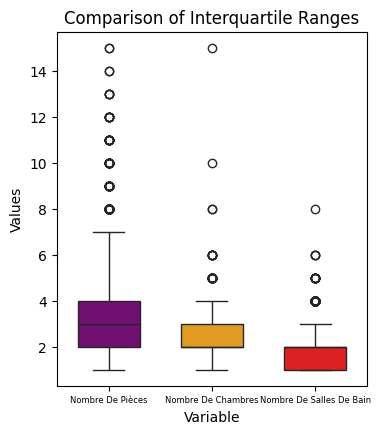

In [58]:
plt.figure(figsize=(4, 4.6))
# Melt the DataFrame to create a suitable format for the boxplot
df_melted = df.melt(value_vars=["Nombre De Pièces", "Nombre De Chambres", "Nombre De Salles De Bain"], var_name="Variable", value_name="Value")

sns.boxplot(x="Variable", y="Value", data=df_melted, hue="Variable", palette=['purple', 'orange', 'red'], width=0.6, legend=False)
plt.ylabel('Values')
plt.title('Comparison of Interquartile Ranges')

# Reduce the size of the x-axis labels
plt.xticks(fontsize=6)

plt.savefig("1.png")
plt.show()


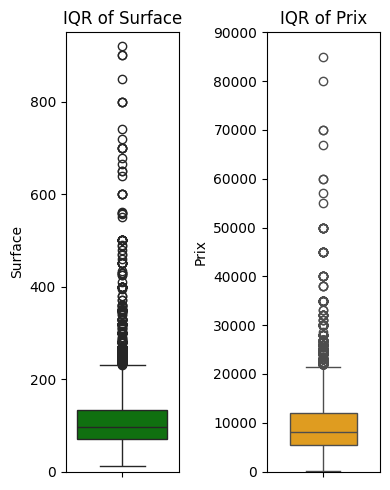

In [59]:
plt.figure(figsize=(4, 5))

# Subplot 1: Surface
plt.subplot(1, 2, 1)
sns.boxplot(y=df["Surface"], color='green')
plt.title('IQR of Surface')
plt.ylim(0, 950)  # Set the y-axis limits from 0 to 1000

# Subplot 2:'Prix'
plt.subplot(1, 2, 2)
sns.boxplot(y=df["Prix"],width=0.6, color='orange')
plt.title('IQR of Prix')
plt.ylim(0, 90000)  # Set the y-axis limits from 0 to 1000

plt.tight_layout()
plt.savefig("2.png")
plt.show()


There are many outlier values in most of the columns, but we'll not delete them especially the "Nombre De Pièces","Nombre De Chambres" & "Nombre De Salles De Bain" as they are real values and are part of the data variance.

#### Using z-score

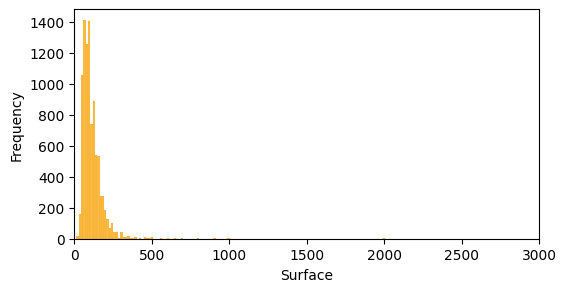

In [60]:
fig, ax = plt.subplots(figsize=(6, 6)) 
plot = sns.histplot(df['Surface'], binwidth=15, color='orange', ax=ax)
ax.set_xlabel('Surface')
ax.set_ylabel('Frequency')
ax.set_xlim(0, 3000)
ax.set_aspect('equal')  
plt.show()


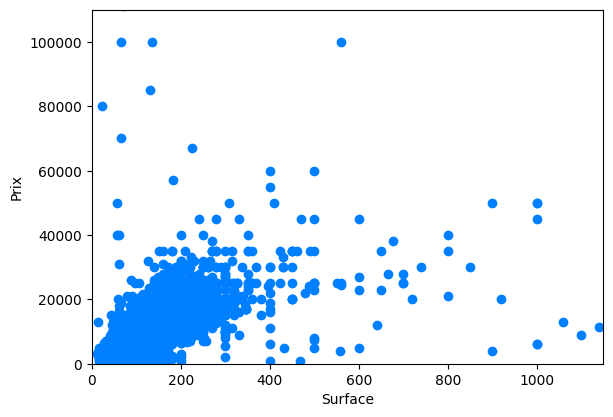

In [61]:
plt.figure(figsize=(6.6, 4.6))

plt.scatter( df['Surface'] ,df['Prix'] ,color='#0080ff', label='Training Data')
plt.xlabel("Surface")
plt.ylabel('Prix')
plt.xlim(0, 1150)
plt.ylim(0, 110000)
plt.savefig("data.png")

"Prix" & "Surface" column outliers

In [62]:
z_scores = np.abs(stats.zscore(df['Prix']))
threshold = 3
outliersZ = z_scores > threshold

# Print the outliers
print(df['Prix'][outliers].count())


129


In [63]:
z_scores = np.abs(stats.zscore(df['Surface']))
threshold = 3
outliersZ = z_scores > threshold

# Print the outliers number
print(df['Prix'][outliers].count())


129


The z-score analysis didn't reveal significant outliers for "Prix" and "Suracec," even though there are many dataoutlier  points. Therefore, we'll employ the IQR (Interquartile Range) method to analyze outliers for these two attributes.

"Prix" Column

In [64]:
outliersQP.describe()

,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Étage,Jardin,Terrasse,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
count,3.990000e+02,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,...,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,5.461572e+05,0.922306,389.824561,4.766917,3.190476,2.736842,1.428571,4.027569,0.471178,0.804511,...,0.007519,0.052632,0.501253,0.012531,0.007519,0.047619,0.007519,0.225564,0.017544,0.120301
std,5.673928e+06,0.268026,1285.038479,2.043081,1.097649,0.960748,0.495493,2.875427,0.499795,0.397074,...,0.086493,0.223577,0.500626,0.111379,0.086493,0.213226,0.086493,0.418478,0.131451,0.325721
min,2.200000e+04,0.000000,23.000000,1.000000,1.000000,1.000000,1.000000,-8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.375000e+04,1.000000,175.000000,4.000000,3.000000,2.000000,1.000000,2.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.600000e+04,1.000000,221.000000,5.000000,3.000000,3.000000,1.000000,3.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.500000e+04,1.000000,300.000000,6.000000,4.000000,3.000000,2.000000,4.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.111110e+08,1.000000,20000.000000,15.000000,15.000000,8.000000,2.000000,20.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
df.shape

(9311, 36)

In [66]:
df = df[~outlier_condition]

Analysis: We decided to remove all outliers in the ‘Prix’ column. This is because when the price exceeds 20000DHs, other factors come into consideration. These factors may not be present, as they might not have been collected or set by the property owner.

"Surface" column outliers

In [67]:
df.shape

(8912, 36)

In [68]:
Q1 = df["Surface"].quantile(0.25)
Q3 = df["Surface"].quantile(0.75)
IQR = Q3 - Q1
# Define a condition for an outlier
outlier_condition = (df["Surface"] < (Q1 - 1.5 * IQR)) | (df["Surface"] > (Q3 + 1.5 * IQR))
# Get the outliers
outliersQS = df[outlier_condition]
# Print the number of outliers
print("\nNumber of outliers in Surface:", outliersQS.shape[0])




Number of outliers in Surface: 253


In [69]:
df.shape

(8912, 36)

In [70]:
outliersQS.describe()

,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Étage,Jardin,Terrasse,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,253.000000,253.000000,253.000000,253.0,253.000000,253.0,253.000000,253.000000,253.000000
mean,15336.841897,0.905138,495.059289,5.205534,3.284585,2.660079,1.268775,3.162055,0.438735,0.857708,...,0.007905,0.086957,0.422925,0.083004,0.0,0.114625,0.0,0.166008,0.019763,0.098814
std,4580.914686,0.293605,1212.464799,1.991363,0.775390,0.752685,0.444201,1.520176,0.497216,0.350042,...,0.088734,0.282330,0.495003,0.276435,0.0,0.319200,0.0,0.372825,0.139460,0.299004
min,750.000000,0.000000,224.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,12000.000000,1.000000,240.000000,4.000000,3.000000,2.000000,1.000000,2.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,16000.000000,1.000000,260.000000,5.000000,3.000000,3.000000,1.000000,3.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
75%,19000.000000,1.000000,300.000000,6.000000,4.000000,3.000000,2.000000,4.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
max,21500.000000,1.000000,12000.000000,15.000000,8.000000,6.000000,2.000000,10.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000


In [71]:
#  a condition for the outliers to keep
keep_condition = (outliersQS["Prix"] > 10000.0) & ((outliersQS["Nombre De Pièces"] > 4) | (outliersQS["Nombre De Chambres"] > 4))

# Get the outliers to keep
outliers_to_keep = outliersQS[keep_condition]

# Get the outliers to remove
outliers_to_remove = outliersQS[~keep_condition]

# Remove the outliers from the DataFrame
df = df.drop(outliers_to_remove.index)


We'll remove all "Surface" outliers except the ones that seem to be logic.

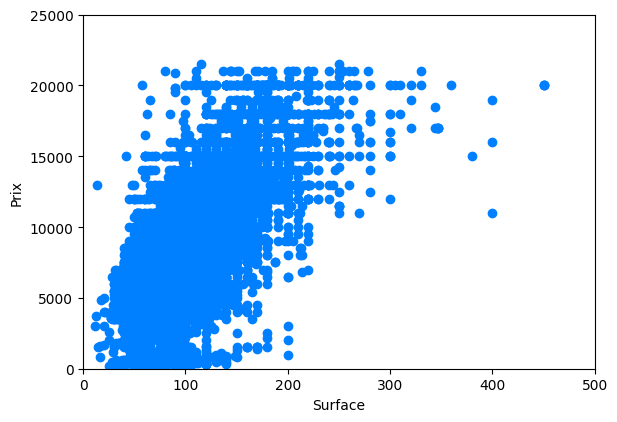

In [72]:
plt.figure(figsize=(6.6, 4.6))
plt.scatter( df['Surface'] ,df['Prix'] ,color='#0080ff', label='Training Data')
plt.xlabel("Surface")
plt.ylabel('Prix')
plt.xlim(0, 500)
plt.ylim(0, 25000)
plt.savefig("data1.png")

In [73]:
df.shape

(8801, 36)

In [74]:
df.to_csv("../CSV's/Mubawab_Rental_Data_Transformed_&_Preprocessed.csv", index=False)